# Overview

Using data from all stages and all editions of the Tour de France, this analysis seeks to find out if the Tour de France has gotten harder over the years. I will be looking at the following criteria:

- Length of each stage
- Number of stages
- Overall distance
- Ratio of stage types

This last bullet point indicates perhaps not so much the difficulty of the Tour, but also the level of skill required to be a GC contender. If, in the past, one could get by focusing on sprinting alone, or climbing alone, a more balanced tour would require riders to at least be able to hang on through the mountains and not lose time, or, conversely, have the team set-up and skills to take advantage of long, flat stages. 

This is definitely not an exhaustive analysis! Improvement in technique, technology and the rise of professional rather than amateur cycling (and the accompanying increase in access to expertise in physiology, training, etc.) are not accounted for in this experiment. I am looking specifically only at the physical course -- and even then not taking into account things like the fact that roads are more widely paved in the modern era! -- and the broad characteristics of each year's race.

## A Note on Doping

One advantage of looking only at the physical course, independent of technology and individual skill, is that I am able to essentially ignore the long history of cheating in cycling. From the earliest races, stories of cheating were endemic, and drug use was common in the post-WWII period, to gloss a very complex history. The rise of blood doping in the 90's and 2000's took it to another level. Accusations of doping and mechanical assistance are still common, but in theory should not have much of an effect on the actual design of the race, which is the focuse of this analysis.

Which is a longwinded way of saying that yes, Lance Armstrong's name appears in the data set, but is also pointedly ignored.

In [165]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [166]:
# read in the data and get a sense of what it looks like. 
#This was already cleaned and assembled from disparate sources in the accompanying .Rmd file

df = pd.read_csv('stages_TDF_all.csv')

In [167]:
df.head()

,Unnamed: 0,Stage,Date,Distance_km,Type,Winner,Type_general
0,1,1,2017-07-01,14.0,Individual time trial,Geraint Thomas,time trial
1,2,2,2017-07-02,203.5,Flat stage,Marcel Kittel,flat
2,3,3,2017-07-03,212.5,Medium mountain stage,Peter Sagan,mountain
3,4,4,2017-07-04,207.5,Flat stage,Arnaud Démare,flat
4,5,5,2017-07-05,160.5,Medium mountain stage,Fabio Aru,mountain


In [168]:
df.tail()

,Unnamed: 0,Stage,Date,Distance_km,Type,Winner,Type_general
2315,2316,17,2021-07-14,178.4,Mountain stage,Tadej Pogačar,mountain
2316,2317,18,2021-07-15,129.7,Mountain stage,Tadej Pogačar,mountain
2317,2318,19,2021-07-16,207.0,Flat stage,Matej Mohorič,flat
2318,2319,20,2021-07-17,30.8,Individual time trial,Wout van Aert,time trial
2319,2320,21,2021-07-18,108.4,Flat stage,Wout van Aert,flat


In [169]:
# start with some basic cleaning to make sure all dtypes are cast 
# sensibly, drop the weird Unnamed column, and put the whole thing in date order for readability.

In [170]:
df = df.drop(['Unnamed: 0'], axis=1)

In [171]:
dataTypeSeries = df.dtypes

print(dataTypeSeries)

Stage            object
Date             object
Distance_km     float64
Type             object
Winner           object
Type_general     object
dtype: object


In [172]:
df['Stage'] = df['Stage'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Type_general'] = df['Type_general'].astype('category')
df['Date'] = pd.to_datetime(df['Date'])

In [173]:
df = df.sort_values(by=['Date'])

In [174]:
df.head()

,Stage,Date,Distance_km,Type,Winner,Type_general
2230,1,1903-07-01,467.0,Plain stage,Maurice Garin,flat
2231,2,1903-07-05,374.0,Stage with mountain(s),Hippolyte Aucouturier,mountain
2232,3,1903-07-08,423.0,Plain stage,Hippolyte Aucouturier,flat
2233,4,1903-07-12,268.0,Plain stage,Charles Laeser,flat
2234,5,1903-07-13,425.0,Plain stage,Maurice Garin,flat


# Stage Lengths Over Time

Text(0.5, 1.0, 'Individual Stage Distance Over Time')

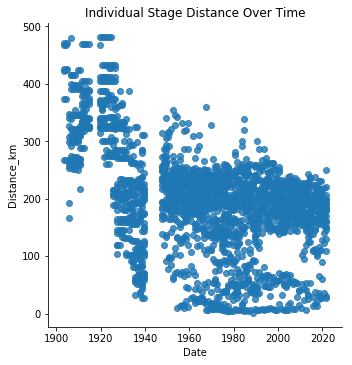

In [175]:
sns.lmplot(x="Date",y="Distance_km",data=df,fit_reg=False)
plt.title('Individual Stage Distance Over Time')

Well, it's pretty clear that individual stages have increased in potential range, but also definitely gotten shorter than pre-WWII and especially pre-WWI stages. The 30's seems to be the changeover point, with stages rarely hitting greater than 300km, and sub-100km stages starting to appear and become more common over the following decades. 
(The slight gap between very short stages and those ~150-300 km is probably a difference between time trials and all other stage types, but we can check that in a moment.)

Text(0.5, 1.0, 'Individual Stage Distance Over Time')

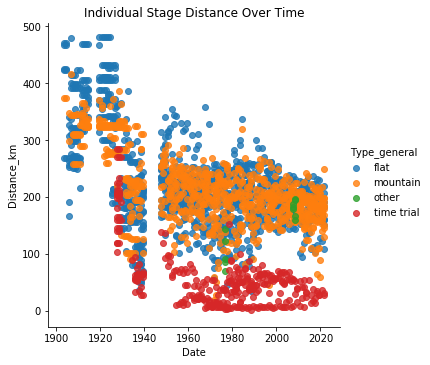

In [176]:
sns.lmplot(x="Date",y="Distance_km",data=df,fit_reg=False,hue='Type_general')
plt.title('Individual Stage Distance Over Time')

Adding coloring via the overall type, we see that time trials are only introduced post-WWI (which probably reflects the race becoming less 'guy with a spare tire over his shoulder and a bottle of wine'), and that they're pretty firmly the cause of those very short stages, especially post-WWII.

(The race was suspended during both world wars for obvious reasons, and that causes the two gaps visible on the plot.)

Although the visualizations make a very convincing argument that stage length has considerably shortened, I want to check the mean and median stage lengths per year, especially since it's harder to tell changes post-WWII.

In [177]:
df['Year'] = df['Date'].dt.year

mean_distance_by_year = df.groupby('Year')['Distance_km'].mean()
median_distance_by_year = df.groupby('Year')['Distance_km'].median()
list_of_years = df['Year'].unique()

summary_df = pd.DataFramedataset = pd.DataFrame({'Year': list_of_years, 
                                                 'mean_distance': mean_distance_by_year, 
                                                 'median_distance': median_distance_by_year})

summary_df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Median Distance by Year')

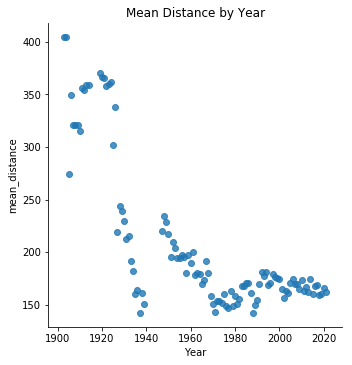

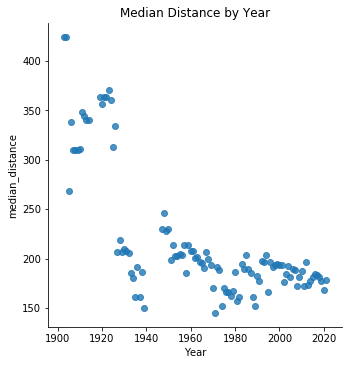

In [178]:
sns.lmplot(x="Year",y="mean_distance",data=summary_df,fit_reg=False)
plt.title('Mean Distance by Year')
sns.lmplot(x="Year",y="median_distance",data=summary_df,fit_reg=False)
plt.title('Median Distance by Year')

## Conclusion

We can say that as a whole, stage length has dropped dramatically from the start of the race through the early twentieth century. Interestingly, though, there was a gradual rise in the mean length of all stages in a given year starting in the 1970's, peaking in approximately the 90's, and very slightly falling off since. Median stage lengths have become a bit more consistent since the early 2000's, but both of these are much smaller changes compared to the radical re-imagining of stage lengths since approximately the 1930's. 

# Number of Stages Over Time

In [179]:
# start by creating a new dataframe that is just the year and the number of stages in the race that year

In [180]:
count_stages_by_year = df.groupby('Year')['Stage'].count()
count_df = pd.DataFramedataset = pd.DataFrame({'Year': list_of_years, 
                                              'Number_of_Stages': count_stages_by_year})

count_df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Number of Stages by Year')

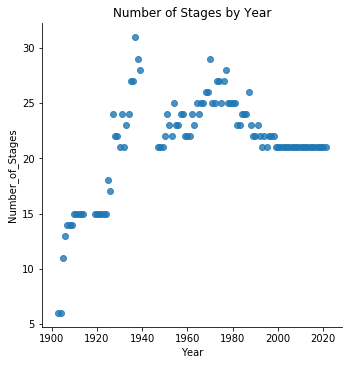

In [181]:
sns.lmplot(x="Year",y="Number_of_Stages",data=count_df,fit_reg=False)
plt.title('Number of Stages by Year')

## Conclusion

It appears that, if nothing else, we have passed out of a period of some experimentation.

The very earliest editions of the race were quite short (well, 'short', these stages were often twice as long as the average stage today!), but quickly grew in number, only falling after WWII. With the return of the race in the postwar period, we see another rise in stage numbers, peaking in approximately the 70's, and then falling gradually until the early 2000's when the race settles into a steady 21 stages per year.

If we assume that more stages indicates a harder race (since even with rest days, riders begin to carry more injuries, exhaustion, and generally continue to lose their ability to recover), the race has actually gotten easier in the last few decades, compared to the bulk of the postwar period. Possibly it could be considered that the race has gotten more difficult since the early 20th century, vis-a-vis number of stages, but the considerably shorter stages may somewhat cancel that out.

And, just for curiosity's sake, the top twenty years with the most stages:

In [182]:
count_df = count_df.sort_values(by=['Number_of_Stages'],ascending=False)
count_df.head(20)

,Year,Number_of_Stages
30,1937,31
31,1938,29
56,1970,29
32,1939,28
63,1977,28
59,1973,27
60,1974,27
28,1935,27
29,1936,27
62,1976,27


# Overall Distance

In [183]:
# Pretty similar to the above, start by making a new df with summed distance per year
# Honestly the whole process should probably become a function by now, but that can be an exercise
# for another day.

In [184]:
sum_distance_by_year = df.groupby('Year')['Distance_km'].sum()
sum_df = pd.DataFramedataset = pd.DataFrame({'Year': list_of_years, 
                                              'Total_distance_km': sum_distance_by_year})

sum_df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Total Distance by Year')

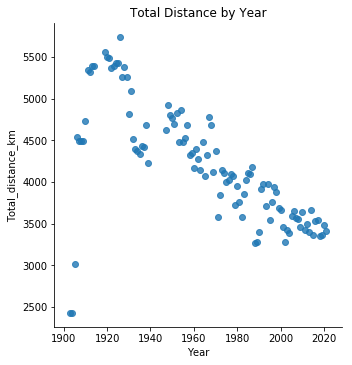

In [185]:
sns.lmplot(x="Year",y="Total_distance_km",data=sum_df,fit_reg=False)
plt.title('Total Distance by Year')

## Conclusion

Excluding the first few years (which have proved thus far to be a very different race altogether), total distance has decreased with very little variation, even after number of stages has stabilized. (Possibly there's a slight plateau since 2000, but it might be a bit early to tell.) All else being equal, this points to the race becoming easier, on the theory that overall, riders are doing less work. 

That said, not all distances are equal! Compare riding ten km on a flat road to ten km on even a relatively small grade; the latter is considerably harder. (Unfortunately it doesn't seem to be captured in any of my data sources, but comparing km climbed year on year could prove interesting!)

# Stage Type Ratios

I was originally going to only look at mountain versus flat stages, but that ignores the importance of time trials and other types of stages, so I will be examining the ratios of the four stage types and seeing if they've changed over the years. A more mountain-heavy race might be more difficult than one that relies on sprints (where often GC contenders can relax a bit), while a very good time trial might allow a rider to gain a lot of time on other contenders (or even seal the yellow jersey as happened in 2020 and most famously 1989) for a relatively technically simple race.

In [186]:
# create a dataframe with count of stage types per year

flats = df[df.Type_general == 'flat']
mountains = df[df.Type_general == 'mountain']
tt = df[df.Type_general == 'time trial']
other = df[df.Type_general == 'other']

flats_count = flats.groupby('Year')['Stage'].count()
mountains_count = mountains.groupby('Year')['Stage'].count()
tt_count = tt.groupby('Year')['Stage'].count()
other_count = other.groupby('Year')['Stage'].count()

types_df = pd.DataFramedataset = pd.DataFrame({'Year': list_of_years, 
                                              'No_flat_stages': flats_count,
                                              'No_mtn_stages': mountains_count,
                                              'No_tt_stages': tt_count,
                                              'No_other_stages': other_count})

types_df.reset_index(drop=True, inplace=True)

In [187]:
types_df = pd.melt(types_df, id_vars=['Year'], value_vars=['No_flat_stages', 'No_mtn_stages', 'No_tt_stages', 'No_other_stages'])

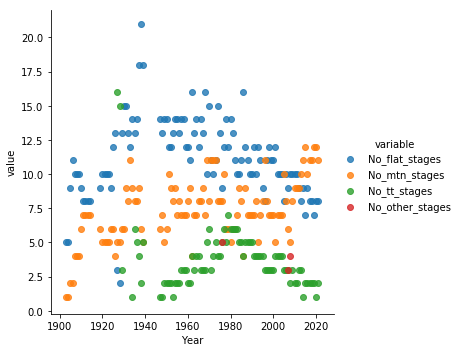

In [188]:
sns.lmplot(x="Year",y="value",data=types_df,fit_reg=False,hue='variable')

## Conclusion

Interesting recent changes! Historically there were always more flat stages than mountain, often by quite a bit, but in recent years we've seen more climbing stages than flats, with close to equal numbers of each. (That is -- there may be more mountain stages, but the count is closer to the number of flat stages than, historically, has occurred.) We also see an interesting rise and fall in the number of time trial stages -- these encompass both team time trial and individual time trial, and seem to have had their heyday in the seventies and eighties.

Although not a direct indicator of difficulty, a GC contender is now well-served by being a good climber, as has been shown in recent years, with the winners in the 2010's generally also being very good climbers.

(Notably, this analysis doesn't capture things like intermediary sprints or whether the mountain stages finish atop the mountain or after a descent, but as a general rule I am working under the assumption that more climbing means riders as a whole are working harder, resulting in a more difficult race.)

# Final Notes

Tentatively, we can say that the race course has probably gotten easier over the decades as a whole, with shorter stages, fewer stages, and less distance travelled overall. This is also probably assisted by improved technology and roads, although does not diminish the fact that this is an incredibly hard race that requires, almost literally, superhuman abilities to complete, let alone win.

Almost more interesting, though, it the story of the race as a whole that emerges. The early years were a few very long stages, and riders were expected to ride unsupported on virtually nonexistent roads - there are stories of riders having to find local blacksmiths, so that they might repair their own bikes, and in general the early Tour bore basically no resemblence to the race that appeared even as early as after WWI. Post-WWII saw a settling-in to a format that more closely resembles the race as ridden today, with a mix of time trial, mountain and flat stages, but allowing room for a fair amount of change and experimentation. However we do see a general fall in the mean length of stages and the overall distance travelled in that time period and continuing even after settling into a set 21 stages per race. With the sudden uptick in number of mountain stages compared to flat, it's clear that experimentation is ongoing.